


---


```

RECONNAISSANCE VISUELLE DE TAGS

Partie : 1/2

Author : Tariq CHELLALI
Last update : 04/12/2022

```


---





## **Installing Packages**

---



***'apriltag'*** package for detecting tags in images

In [ ]:
pip install apriltag

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 201 kB 7.8 MB/s 
  Created wheel for apriltag: filename=apriltag-0.0.16-cp38-cp38-linux_x86_64.whl size=562111 sha256=a0ac19ecb1f6a48bb684f712bd14c7dc60b6304c11904ef8d0ba224fdc46053c
  Stored in directory: /root/.cache/pip/wheels/17/7a/cd/6d11d2f9b2ce94c87067fd6c8fff23d1b3d508166b359364a2
Successfully built apriltag


***'opencv'*** library for processing images

In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Importing Libraries**

---



In [ ]:
import cv2 #opencv library for processing images
import  apriltag # apriltag library for detecting apriltags
import matplotlib.pyplot as plt # For manipulating images and display them
from imutils import paths #  Paths : function used for importing all paths of the images
import pandas as pd # for structuring data into a dataframe and download it as a csv file
import os # For processing our dataset, paths in particular

All the images was in the drive storage cloud (Google Drive), We need to connect our drive account in order to be able to download our dataset of images.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Exploring and understanding data**

---



Once successfully connected to the drive account, we use the paths function that we import from umitilis library

In [ ]:
dataset = "../content/drive/MyDrive/images/images" # Make sure that the path is exactly the path source from you drive storage

In [ ]:
imagePaths=list(paths.list_images(dataset)) # Using the paths function to extraxt paths ( and names ! ) of our images

Let's visualise our data paths images

In [ ]:
for paths in imagePaths :
  print(paths)

../content/drive/MyDrive/images/images/img_002791.png
../content/drive/MyDrive/images/images/img_002829.png
../content/drive/MyDrive/images/images/img_002810.png
../content/drive/MyDrive/images/images/img_002755.png
../content/drive/MyDrive/images/images/img_002785.png
../content/drive/MyDrive/images/images/img_002811.png
../content/drive/MyDrive/images/images/img_002833.png
../content/drive/MyDrive/images/images/img_002809.png
../content/drive/MyDrive/images/images/img_002770.png
../content/drive/MyDrive/images/images/img_002787.png
../content/drive/MyDrive/images/images/img_002743.png
../content/drive/MyDrive/images/images/img_002796.png
../content/drive/MyDrive/images/images/img_002827.png
../content/drive/MyDrive/images/images/img_002817.png
../content/drive/MyDrive/images/images/img_002788.png
../content/drive/MyDrive/images/images/img_002747.png
../content/drive/MyDrive/images/images/img_002762.png
../content/drive/MyDrive/images/images/img_002777.png
../content/drive/MyDrive/ima

Great ! Now let's explore some images and display them to see what they look like.

(-0.5, 719.5, 539.5, -0.5)

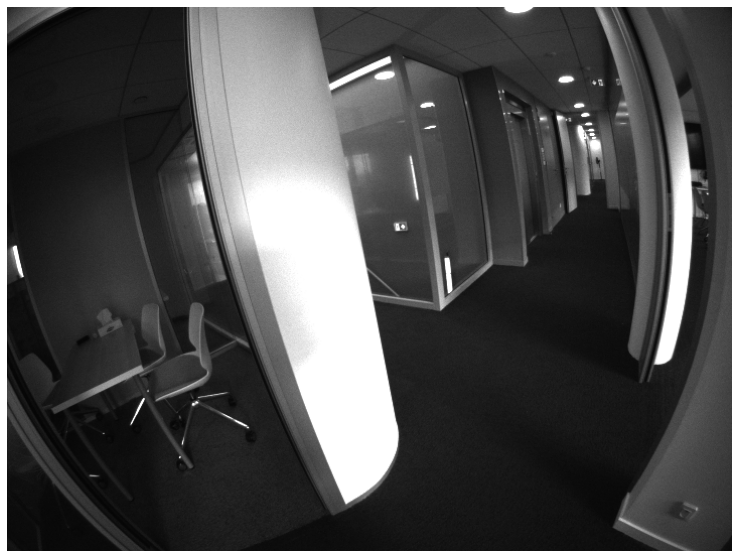

In [ ]:
image = cv2.imread(imagePaths[0])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (20,10))
plt.imshow(image, cmap='Greys_r')
plt.axis('off')

hmm ... nothing intersting ! Let's now visualise some interesting images from our dataset

In [ ]:
text = ["../content/drive/MyDrive/images/images/img_000498.png", "../content/drive/MyDrive/images/images/img_000499.png", "../content/drive/MyDrive/images/images/img_000436.png"] # interesting images

In [ ]:
image = cv2.imread(text[0])
image.shape

(540, 720, 3)

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray.shape

(540, 720)

(-0.5, 719.5, 539.5, -0.5)

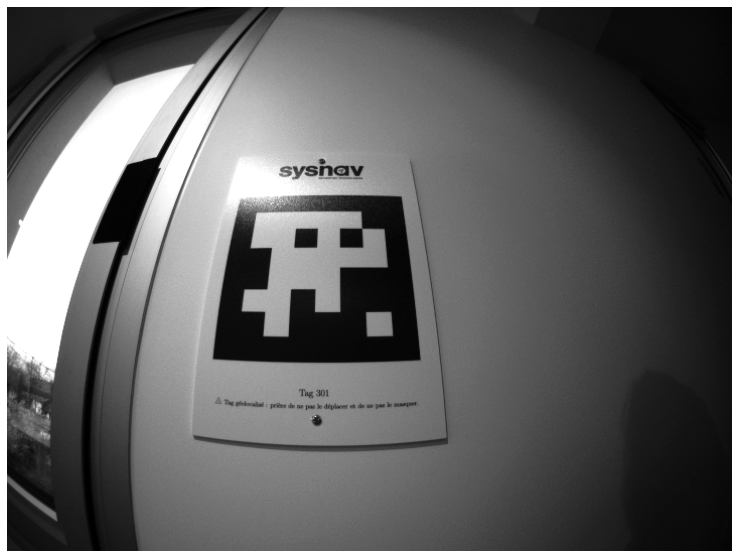

In [ ]:
image = cv2.imread(text[0])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (20,10))
plt.imshow(gray, cmap='Greys_r')
plt.axis('off')

This is our target, an apriltag ! we need to build a neural network that can detect this type of tags.

AprilTags are a special type of tags (or fiducial marker) 🇰


*   They are a square
*   The background is “black.”
*   The foreground is a generated pattern displayed in “white.”
*   There is a black border surrounding the pattern, thereby making it easier to detect.
*   There is a black border surrounding the pattern, thereby making it easier to detect.
*  Not all of them contain a "sysnav" title

(Note: More information about apriltags in the documentation), lets see another image.



(-0.5, 719.5, 539.5, -0.5)

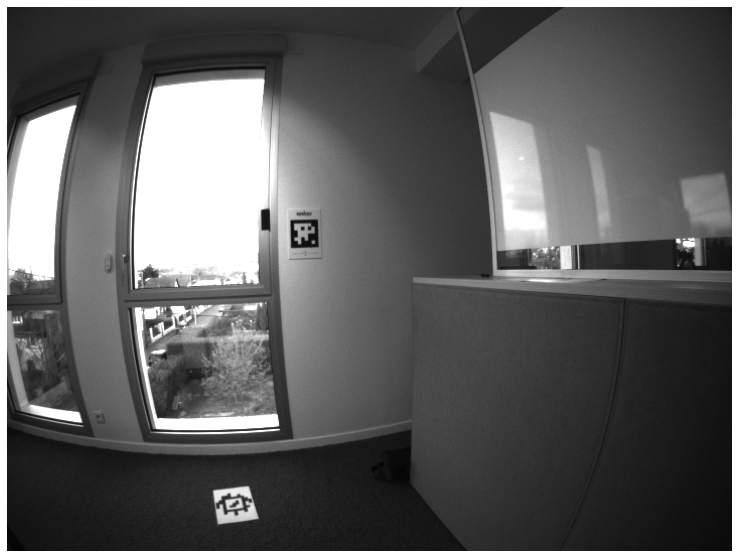

In [ ]:
image = cv2.imread(text[2])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (20,10))
plt.imshow(image, cmap='Greys_r')
plt.axis('off')

oh ! the same picture from another angle. Now we undersdand that images are a video that was taken from a camera and cut to images to make this dataset. We see also another tag on the floor, but it doesn't look like a tag that we have to detect.

(-0.5, 719.5, 539.5, -0.5)

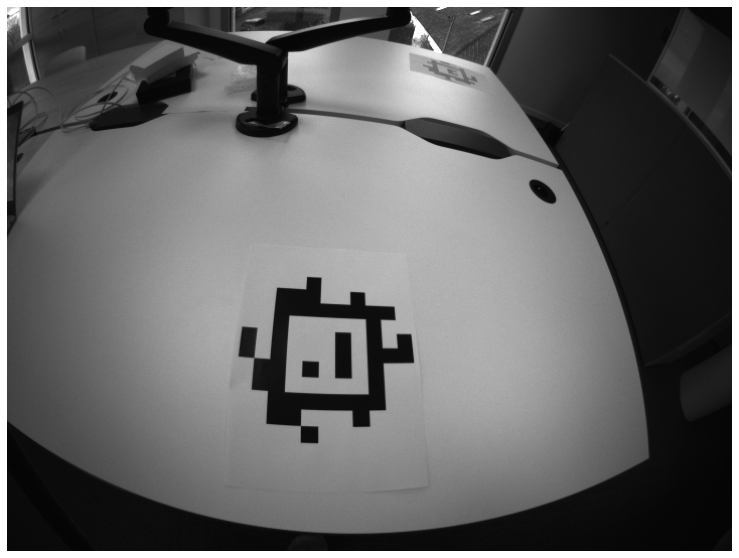

In [ ]:
image = cv2.imread("../content/drive/MyDrive/images/images/img_000326.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (20,10))
plt.imshow(image, cmap='Greys_r')
plt.axis('off')

Another forbidden tag !
Now that we saw our images: we conclude that the dataset contains images


*   Apriltags types (the ones that we must detect)
*   Forbidden tags (the ones that we mustn't detect)
*   Without any tags





Now, let's see how we can accomplish our first mission : Structuring our unstrutured datset into a csv with the ***id of tags*** and their coordinates.

Let's start with identifying the ids of our images.

In [ ]:
test_path = "../content/drive/MyDrive/images/images/img_000326.png" # this is variable for test only, we need to extract the id of the image (326 for this example)

In [ ]:
image_name = os.path.splitext(file_name) # we use a function splittext from the os library to get the name of the file
image_name

('img_000795', '.png')

In [ ]:
image_name[0]

'img_000795'

We are close, now we need to get the id of the function !

In [ ]:
x = image_name[0] # we store our last value in variablle
y = x.split("img_") # we split our string with the split function
y

['', '000795']

In [ ]:
image_id = int(y[len(y)-1]) # we take the last element of our split list
image_id

795

Great ! We have the ids, now we need to loop it on all the paths

In [ ]:
L = []
for paths in imagePaths :
    #find id of an image
    file_name = os.path.basename(paths)
    x = os.path.splitext(file_name)[0]
    y = x.split("img_")
    image_id = int(y[len(y)-1])
    L.append(image_id)

Awesome ! now we need to explore our function from apriltag library to detect the tags, using the documentation in the sheet test (github link : https://github.com/AprilRobotics/apriltag)

(-0.5, 719.5, 539.5, -0.5)

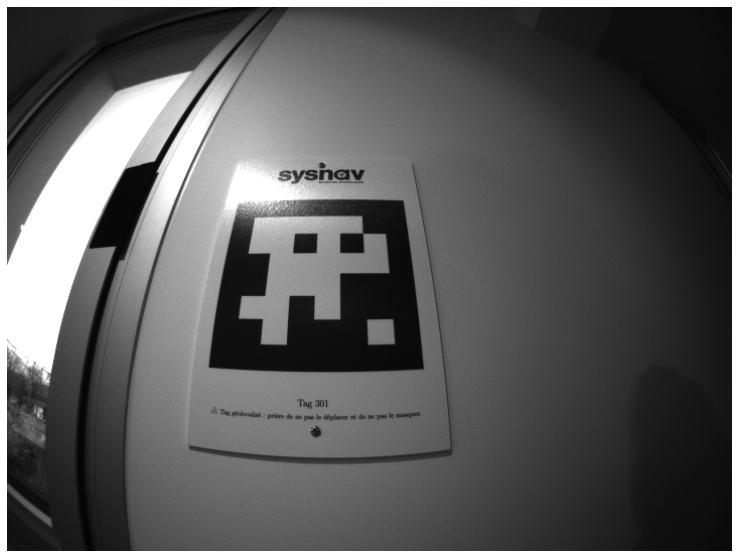

In [ ]:
image = cv2.imread(text[1])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (20,10))
plt.imshow(image, cmap='Greys_r')
plt.axis('off')

Let's try and detect this apriltag !

We first need to specify options, and more specifically, the AprilTag family, The standard/default AprilTag family is “Tag36h11”; however, there are a total of six families in AprilTags (view documentation)

In [ ]:
options = apriltag.DetectorOptions(families="tag36h11") # Specify the apriltag Family
detector = apriltag.Detector(options) # initialize the detector with these options
results = detector.detect(gray) # Display the total number of detected AprilTags
results

[Detection(tag_family=b'tag36h11', tag_id=301, hamming=0, goodness=0.0, decision_margin=68.56759643554688, homography=array([[-6.61837904e-01,  3.42763804e-01, -2.40432062e+00],
        [ 8.87791056e-02, -3.73446915e-01, -2.09106788e+00],
        [ 2.61621597e-04,  1.04588894e-03, -7.86819911e-03]]), center=array([305.57445091, 265.76194275]), corners=array([[227.25724792, 196.86761475],
        [393.98272705, 188.2517395 ],
        [415.10806274, 362.11682129],
        [197.59068298, 360.43457031]]))]

Looks like we detect the coordinnate of our tag in the image (in Px), let's try and display these coordianate using tools from the opencv library

In [ ]:
# loop over the AprilTag detection results
for r in results:
	# extract the bounding box (x, y)-coordinates for the AprilTag
	# and convert each of the (x, y)-coordinate pairs to integers
	(ptA, ptB, ptC, ptD) = r.corners
	ptB = (int(ptB[0]), int(ptB[1]))
	ptC = (int(ptC[0]), int(ptC[1]))
	ptD = (int(ptD[0]), int(ptD[1]))
	ptA = (int(ptA[0]), int(ptA[1]))
	# draw the bounding box of the AprilTag detection
	cv2.line(image, ptA, ptB, (0, 255, 0), 2)
	cv2.line(image, ptB, ptC, (0, 255, 0), 2)
	cv2.line(image, ptC, ptD, (0, 255, 0), 2)
	cv2.line(image, ptD, ptA, (0, 255, 0), 2)

[[227.25724792 196.86761475]
 [393.98272705 188.2517395 ]
 [415.10806274 362.11682129]
 [197.59068298 360.43457031]]


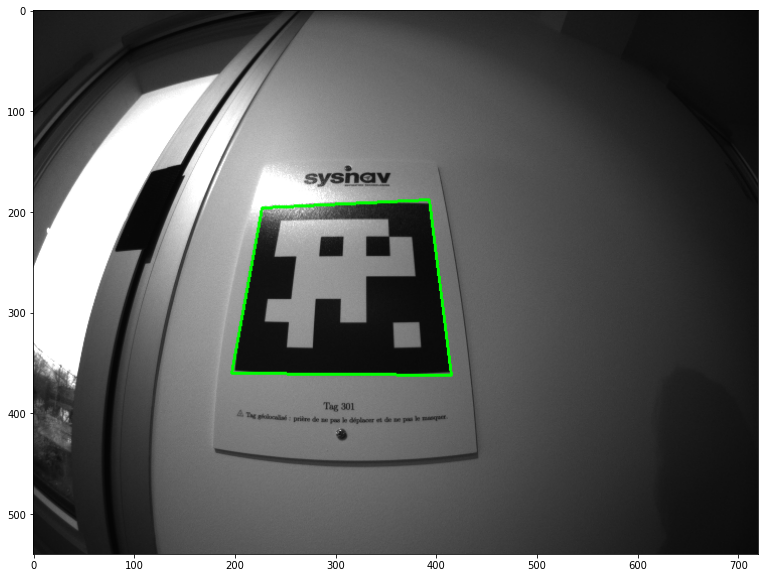

In [ ]:
plt.figure(figsize = (20,10))
plt.imshow(image, cmap='Greys_r')
print(r.corners) # shows the coordinate of the foor point of the box

(-0.5, 719.5, 539.5, -0.5)

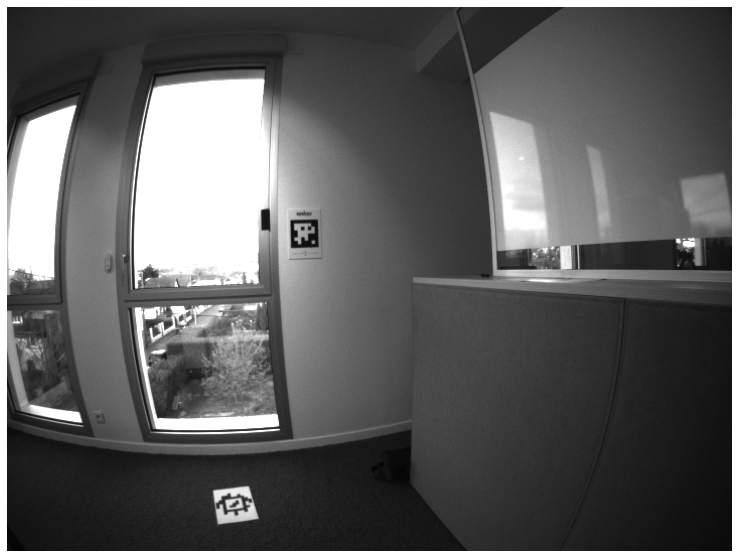

In [ ]:
image = cv2.imread(text[2])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (20,10))
plt.imshow(image, cmap='Greys_r')
plt.axis('off')

[[280.91165161 211.1461792 ]
 [308.69570923 210.98631287]
 [309.76382446 238.8001709 ]
 [282.27639771 239.06332397]]


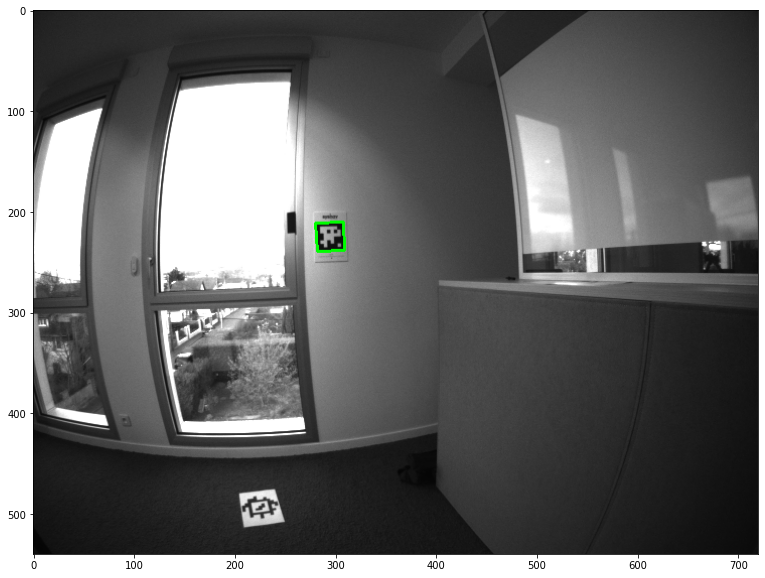

In [ ]:
options = apriltag.DetectorOptions(families="tag36h11") # Specify the apriltag Family
detector = apriltag.Detector(options) # initialize the detector with these options
results = detector.detect(gray) # Display the total number of detected AprilTags
# loop over the AprilTag detection results
for r in results:
	# extract the bounding box (x, y)-coordinates for the AprilTag
	# and convert each of the (x, y)-coordinate pairs to integers
	(ptA, ptB, ptC, ptD) = r.corners
	ptB = (int(ptB[0]), int(ptB[1]))
	ptC = (int(ptC[0]), int(ptC[1]))
	ptD = (int(ptD[0]), int(ptD[1]))
	ptA = (int(ptA[0]), int(ptA[1]))
	# draw the bounding box of the AprilTag detection
	cv2.line(image, ptA, ptB, (0, 255, 0), 2)
	cv2.line(image, ptB, ptC, (0, 255, 0), 2)
	cv2.line(image, ptC, ptD, (0, 255, 0), 2)
	cv2.line(image, ptD, ptA, (0, 255, 0), 2)
plt.figure(figsize = (20,10))
plt.imshow(image, cmap='Greys_r')
print(r.corners) # shows the coordinate of the foor point of the box

Let's try and detect an image withoout an apriltag.

(-0.5, 719.5, 539.5, -0.5)

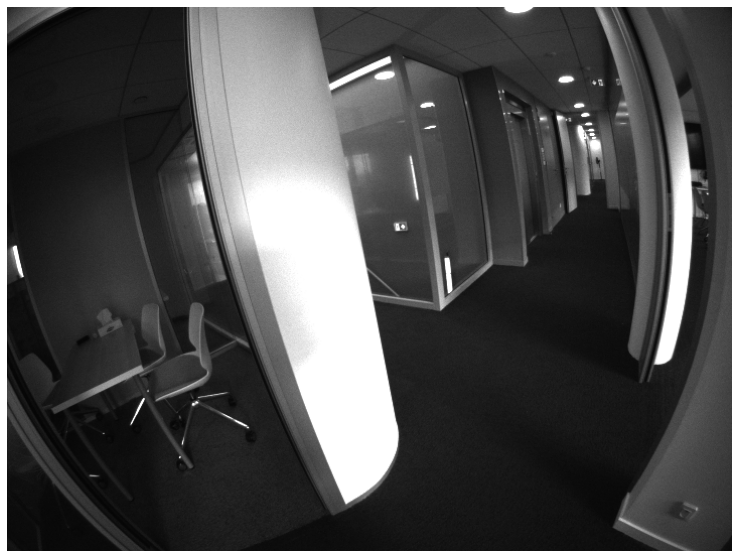

In [ ]:
image = cv2.imread(imagePaths[0])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (20,10))
plt.imshow(image, cmap='Greys_r')
plt.axis('off')

[[280.91165161 211.1461792 ]
 [308.69570923 210.98631287]
 [309.76382446 238.8001709 ]
 [282.27639771 239.06332397]]


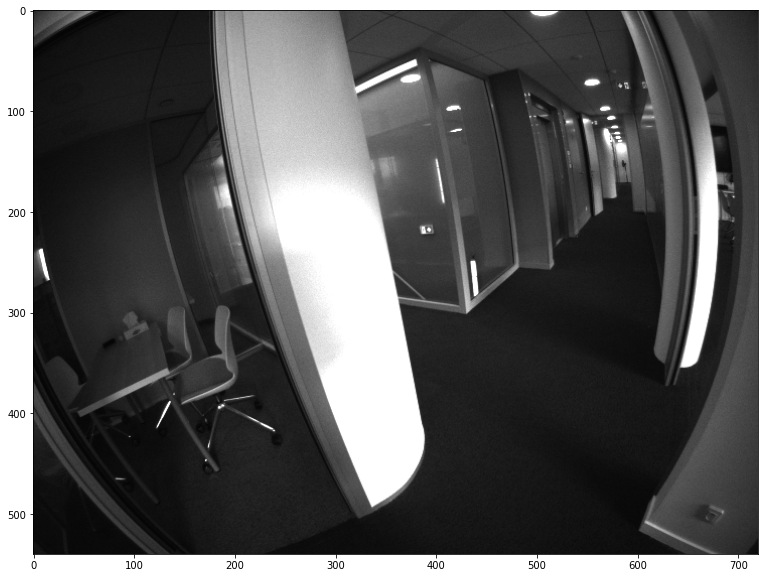

In [ ]:
options = apriltag.DetectorOptions(families="tag36h11") # Specify the apriltag Family
detector = apriltag.Detector(options) # initialize the detector with these options
results = detector.detect(gray) # Display the total number of detected AprilTags
# loop over the AprilTag detection results
for r in results:
	# extract the bounding box (x, y)-coordinates for the AprilTag
	# and convert each of the (x, y)-coordinate pairs to integers
	(ptA, ptB, ptC, ptD) = r.corners
	ptB = (int(ptB[0]), int(ptB[1]))
	ptC = (int(ptC[0]), int(ptC[1]))
	ptD = (int(ptD[0]), int(ptD[1]))
	ptA = (int(ptA[0]), int(ptA[1]))
	# draw the bounding box of the AprilTag detection
	cv2.line(image, ptA, ptB, (0, 255, 0), 2)
	cv2.line(image, ptB, ptC, (0, 255, 0), 2)
	cv2.line(image, ptC, ptD, (0, 255, 0), 2)
	cv2.line(image, ptD, ptA, (0, 255, 0), 2)
plt.figure(figsize = (20,10))
plt.imshow(image, cmap='Greys_r')
print(r.corners) # shows the coordinate of the foor point of the box

Great! Nothing was detected. Now let's build our Pipline code to generate every data needed in a dataframe and export it as csv file

In [ ]:
#Structured dataset cleaned but not normalized
df = pd.DataFrame(columns = ['image_id', 'upper_left_x', 'upper_left_y', 'upper_right_x', 'upper_right_y', 'lower_left_x', 'lower_left_y', 'lower_right_x', 'lower_right_y'])
for paths in imagePaths :
  #find id of an image
  file_name = os.path.basename(paths)
  x = os.path.splitext(file_name)[0]
  y = x.split("img_")
  image_id = int(y[len(y)-1])
  #find coordinate
  image = cv2.imread(paths)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  options = apriltag.DetectorOptions(families="tag36h11")
  detector = apriltag.Detector(options)
  results = detector.detect(gray)
  if len(results)!=0 :
    for r in results :
      coord = r.corners
      #store the right coordinnate
      upper_left_x, upper_left_y = coord[0][0] , coord[0][1]
      upper_right_x, upper_right_y = coord[1][0], coord[1][1]
      lower_left_x, lower_left_y = coord[3][0], coord[3][1]
      lower_right_x, lower_right_y = coord[2][0], coord[2][1]
      #Insert our coordinate to
      data = [image_id,upper_left_x,upper_left_y,upper_right_x,upper_right_y,lower_left_x ,lower_left_y,lower_right_x,lower_right_y]
      data = pd.DataFrame(data)
      df = pd.concat([df, data])

In [ ]:
df = df.astype({'image_id': int,
                })
df

,image_id,upper_left_x,upper_left_y,upper_right_x,upper_right_y,lower_left_x,lower_left_y,lower_right_x,lower_right_y
0,2755,475.484802,198.497635,543.919495,207.803116,467.549103,269.072296,535.729736,280.015991
1,2770,678.720703,169.226242,718.334351,182.874359,674.041260,230.610672,717.986389,245.686584
2,2743,409.816040,186.480392,505.300385,194.213928,402.754700,282.376923,497.874695,292.348511
3,2747,420.752075,184.034714,505.099243,193.409683,412.004150,268.517883,496.114014,280.287659
4,2762,582.551636,196.459000,638.541687,209.454437,574.171875,261.492767,630.238586,275.127228
...,...,...,...,...,...,...,...,...,...
2018,687,640.036377,225.596756,666.000122,227.458862,642.491150,264.821136,668.388489,265.601929
2019,654,262.112122,250.582565,317.077637,252.316238,266.895020,314.557709,322.953369,310.601013
2020,639,403.927734,242.860352,457.799622,245.357269,412.171417,312.154419,466.884491,307.447235
2021,662,261.432404,242.147293,309.357666,244.179321,264.231964,296.798462,313.052826,294.630493


In [ ]:
df.to_csv('../content/drive/MyDrive/Cleaned_not_normlized_data.csv ')

# **Normalisation dataset**

---


We might need to normalize our coordinates. *Normalization is a rescaling of the data from the original range so that all values are within the range of 0 and 1.*

It's used because normalized data helps us converge faster when trainning our model.

There are many methods to normalize our data. Here, our Normalization consist of dividing our x-coordinates with the width of the corresponding array image and our y-coordinates with the height of the corresponding array image.

In [ ]:
# Get structured data cleaned and normalized
df = pd.DataFrame(columns = ['image_id', 'upper_left_x', 'upper_left_y', 'upper_right_x', 'upper_right_y', 'lower_left_x', 'lower_left_y', 'lower_right_x', 'lower_right_y'])
for paths in imagePaths :
    #find id of an image
    file_name = os.path.basename(paths)
    x = os.path.splitext(file_name)[0]
    y = x.split("img_")
    image_id = int(y[len(y)-1])
    int(image_id)
    #find coordinate
    image = cv2.imread(paths)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    options = apriltag.DetectorOptions(families="tag36h11")
    detector = apriltag.Detector(options)
    results = detector.detect(gray)
    h,w,d = image.shape
    if len(results)!=0 :
      for r in results :
          coord = r.corners
          #store the right coordinnate
          upper_left_x = coord[0][0]/w # normalisation !!
          upper_left_y = coord[0][1]/h #normalisation !!
          upper_right_x = coord[1][0]/w
          upper_right_y = coord[1][1]/h
          lower_left_x = coord[3][0]/w
          lower_left_y = coord[3][1]/h
          lower_right_x = coord[2][0]/w
          lower_right_y = coord[2][1]/h
          data = {'image_id': image_id,'upper_left_x': upper_left_x,
                      'upper_left_y':upper_left_y,
                      'upper_right_x': upper_right_x,
                      'upper_right_y':upper_right_y,
                      'lower_left_x': lower_left_x,
                      'lower_left_y':lower_left_y,
                    'lower_right_x':lower_right_x,
                    'lower_right_y': lower_right_y }
          df = df.append(data, ignore_index=True)


In [ ]:
df.sort_values(by=['image_id'])

,image_id,upper_left_x,upper_left_y,upper_right_x,upper_right_y,lower_left_x,lower_left_y,lower_right_x,lower_right_y
1643,227.0,0.183158,0.388225,0.198530,0.384627,0.184717,0.418019,0.198986,0.415100
1644,228.0,0.209763,0.391337,0.224928,0.388021,0.209952,0.420997,0.225251,0.418065
1642,229.0,0.237347,0.393090,0.252599,0.389241,0.238506,0.421835,0.253800,0.419464
1651,230.0,0.266632,0.393562,0.281876,0.390366,0.266666,0.422816,0.282208,0.419938
1649,231.0,0.297197,0.393611,0.312470,0.391143,0.297173,0.422714,0.312837,0.420476
...,...,...,...,...,...,...,...,...,...
405,3775.0,0.135146,0.377385,0.180330,0.371537,0.137927,0.447176,0.184023,0.438424
418,3776.0,0.104700,0.385937,0.148491,0.379466,0.107392,0.455173,0.152072,0.446078
422,3777.0,0.074194,0.394322,0.116275,0.387910,0.076772,0.463412,0.119875,0.453976
412,3778.0,0.041153,0.401326,0.081572,0.395043,0.043542,0.470210,0.085035,0.461183


# ***Save our DataFrame in csv File***

---



In [ ]:
df = df.to_csv('../content/drive/MyDrive/cleaned_and_normalized_dataset.csv ')
df

# **Normalisation Dataset with forbidden tags coordinates (Important)**

This is the dataframe that we should use to train our deep learning model because we should
Not only train our model to detect apriltags but also train **NOT TO** detect Forbidden tags LIKE QR-codes. So, the naan values are important! because it’s helps us not only predict the coordinate of April tags but also classify the tags as NOT an Apriltag.  

In [ ]:
# Get structured data cleaned and normalized
df = pd.DataFrame(columns = ['image_id', 'upper_left_x', 'upper_left_y', 'upper_right_x', 'upper_right_y', 'lower_left_x', 'lower_left_y', 'lower_right_x', 'lower_right_y'])
for paths in imagePaths :
    #find id of an image
    file_name = os.path.basename(paths)
    x = os.path.splitext(file_name)[0]
    y = x.split("img_")
    image_id = int(y[len(y)-1])
    int(image_id)
    #find coordinate
    image = cv2.imread(paths)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    options = apriltag.DetectorOptions(families="tag36h11")
    detector = apriltag.Detector(options)
    results = detector.detect(gray)
    h,w,d = image.shape
    if len(results)!=0 :
      for r in results :
          coord = r.corners
          #store the right coordinnate
          upper_left_x = coord[0][0]/w # normalisation !!
          upper_left_y = coord[0][1]/h #normalisation !!
          upper_right_x = coord[1][0]/w
          upper_right_y = coord[1][1]/h
          lower_left_x = coord[3][0]/w
          lower_left_y = coord[3][1]/h
          lower_right_x = coord[2][0]/w
          lower_right_y = coord[2][1]/h
          data = {'image_id': image_id,'upper_left_x': upper_left_x,
                      'upper_left_y':upper_left_y,
                      'upper_right_x': upper_right_x,
                      'upper_right_y':upper_right_y,
                      'lower_left_x': lower_left_x,
                      'lower_left_y':lower_left_y,
                    'lower_right_x':lower_right_x,
                    'lower_right_y': lower_right_y }
          df = df.append(data, ignore_index=True)
    else :
            data = {'image_id': image_id,'upper_left_x': None, # other images that does not contain any apriltag should be included in the dataset
                      'upper_left_y':None,
                      'upper_right_x': None,
                      'upper_right_y':None,
                      'lower_left_x': None,
                      'lower_left_y':None,
                    'lower_right_x': None,
                    'lower_right_y': None }
            df = df.append(data, ignore_index=True)


In [ ]:
df = df.to_csv('../content/drive/MyDrive/mix_cleaned_dataset.csv ')

# **This is the end of the first part of our mission. We managed to make unstructured dataset a structured data in a csv file. **
♥
---

